In [10]:
#imports
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
#get data
data = pd.read_csv('./dataSets/PNAS_SDWA_Violations_Regression_Data.csv')

In [6]:
data.head(10)

,utility_id,location_state_abbrev,year,All_Violation_Categories,Lag_All_Violation_Categories,TotalColiform_Violation,Lag_TotalColiform_Violation,private_ownership,size_medium,size_large,water_source_purchased,water_source_surfacewater,ln_median_household_income,nonwhite,ln_housing_density,hhi
0,1,WA,1982,0,0,0,0,0,1,0,1,0,10.87335,0.057236,3.078637,0.174275
1,1,WA,1983,0,0,0,0,0,1,0,1,0,10.87654,0.058056,3.102735,0.174275
2,1,WA,1984,0,0,0,0,0,1,0,1,0,10.87970,0.058684,3.125867,0.174275
3,1,WA,1985,0,0,0,0,0,1,0,1,0,10.88288,0.059272,3.148530,0.174275
4,1,WA,1986,1,0,1,0,0,1,0,1,0,10.88614,0.059972,3.171176,0.174275
5,1,WA,1987,1,1,1,1,0,1,0,1,0,10.88952,0.060934,3.194220,0.174275
6,1,WA,1988,0,1,0,1,0,1,0,1,0,10.89306,0.062312,3.218034,0.174275
7,1,WA,1989,1,0,1,0,0,1,0,1,0,10.89682,0.064257,3.242958,0.174275
8,1,WA,1990,0,1,0,1,0,1,0,1,0,10.90083,0.066920,3.269288,0.174275
9,1,WA,1991,0,0,0,0,0,1,0,1,0,10.90592,0.070513,3.296873,0.174275


### About data

Total Coliform
... a variety of bacteria that are mostly not harmful to humans, but serve as an indicator for E. coli, parasites (e.g., Cryptosporidium, Giardia lamblia), and viruses. 

Small, medium, large utilities
small utilities serve 501–3,300 people, medium serve 3,301– 10,000, and large serve more than 10,000 (14)

Housing density:
rural [<16 units per square mile (sq. mi.)], sub- urban (16–380.7 units per sq. mi.), and urban (>380.7 units per sq. mi.)

Household income:
Low-income counties have median household income below 75% of national median household income. In year 2015, national median household income was $55,775 and 45% of rural CWSs are located in counties defined as low-income.

Regions:
Regions are based on the US BEA classifications. Southwest region includes Arizona, Oklahoma, New Mexico, and Texas. Plains region includes Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota. The Great Lakes includes Illinois, Indiana, Michigan, Ohio, and Wisconsin. Far West comprises California, Nevada, Oregon, and Washington. Rocky Mountains includes Colorado, Idaho, Montana, Utah, and Wyoming. Southeast includes Alabama, Arkansas, Georgia, Florida, Kentucky, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, and West Virginia. The Northeast is a combination of the BEA regions New England and Mideast, which include Connecticut, District of Columbia, Delaware, Massachusetts, Maryland, Maine, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, and Vermont.

Rules:
Notes: SDWA rule names and enforcement dates are as follows: Arsenic, Arsenic Rule (2006); GWR, Ground Water Rule (2009); IESW, Interim Enhanced Surface Water Treatment Rule (2002); LCR, Lead and Copper Rule (1992); LT1ESW, Long Term 1 Enhanced Surface Water Treatment Rule (2005); NIPDWR, National Interim Primary Drinking Water Regulations (1977); Phase I Rule (1989); Phase II Rule (1992); Phase V Rule (1994); Radionuclides, Radionuclides Rule (2003); RLCR, Revised Lead and Copper Rule (2007); RTCR, Revised Total Coliform Rule (2016); Stage 1 DBPs, Stage 1 Disinfectants and Disinfection By-products Rule (2002–2004); Stage 2 DBPs, Stage 2 Disinfectants and Disinfection By-products Rule (2012–2013); SWTR, Surface Water Treatment Rule (1993); TCR, Total Coliform Rule (1990); and Trihalomethanes, Total Trihalomethanes (1981–1983).

In [4]:
#Aggregating data by state to find Averages
# [ { State_Abrev : 1981: N_violations ... 2015: N_violations }]
states = {}
for row in data.iterrows():
    obs = row[1]
    abbrev = obs['location_state_abbrev']
    year = obs['year']
    if abbrev not in states:
        states[abbrev] = {}
    if year not in states[abbrev]:
        states[abbrev][year] = {}
        states[abbrev][year]['total'] = 0
        states[abbrev][year]['num_obs'] = 0
    states[abbrev][year]['total'] += obs['All_Violation_Categories']
    states[abbrev][year]['num_obs'] += 1
        


In [5]:
with open('./states_average.json', 'w') as file:
    file.write(json.dumps(states))

(array([5.00000e+00, 1.99000e+02, 2.37000e+03, 1.78030e+04, 9.25100e+04,
        2.09092e+05, 1.86698e+05, 6.80230e+04, 2.87730e+04, 3.12700e+03]),
 array([ 9.480463 ,  9.7065217,  9.9325804, 10.1586391, 10.3846978,
        10.6107565, 10.8368152, 11.0628739, 11.2889326, 11.5149913,
        11.74105  ]),
 <a list of 10 Patch objects>)

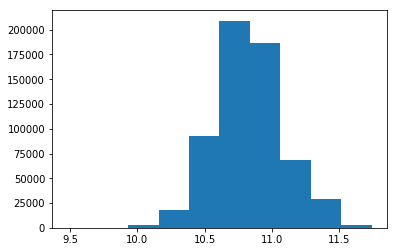

In [11]:
plt.hist(data['ln_median_household_income'])
#seperating data
#low income rural

#high income rural


#suburban

#urban

